In [28]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# Set CPU as available physical device
!export CUDA_VISIBLE_DEVICES=-1
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import shutil
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from PIL import Image
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2



ROOT_DIR = os.path.abspath("./")

DIR_TO_SAVE = "./TestMarkerResults/"

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils


############################################################
#  Configurations
############################################################


class GenericConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """

    def __init__(self, classes, steps):
        self.NUM_CLASSES = classes +1
        self.STEPS_PER_EPOCH = steps
        super().__init__()


    NAME = "class"
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.1
    IMAGE_MAX_DIM=448
    IMAGE_MIN_DIM=384
    TRAIN_ROIS_PER_IMAGE=20
    DETECTION_NMS_THRESHOLD=0.1
    DETECTION_MAX_INSTANCES=10



In [33]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax



def predict(model, image_path, labels):
    
    print(f"labels {labels}")

    image = Image.open(image_path).convert('RGB')
    image = np.array(image)
    
    results = model.detect([image], verbose=0)

    r = results[0]
    classes = ["background"]
    classes += labels

    
    out = display_instances(image,r['rois'],r['masks'],r['class_ids'],classes,r['scores'])
    plt.imshow(out)
    plt.show()
    


In [41]:

import random
def random_colors(N):
    np.random.seed(1)
    colors = [tuple(255 * np.random.rand(3)) for _ in range(N)]
    return colors


def apply_mask(image, mask, color, alpha=0.5):
    """apply mask to image"""
    for n, c in enumerate(color):
        image[:, :, n] = np.where(
            mask == 1,
            image[:, :, n] * (1 - alpha) + alpha * c,
            image[:, :, n]
        )
    return image


def display_instances(image, boxes, masks, ids, names, scores):
    """
        take the image and results and apply the mask, box, and Label
    """
    n_instances = boxes.shape[0]
    colors = random_colors(n_instances)

    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]

    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue

        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label
        mask = masks[:, :, i]

        image = apply_mask(image, mask, color)
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        image = cv2.putText(
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2
        )
        plt.imsave(f"/media/sohaib/additional_/DataScience/OCR/mrcnn_results/{int(random.random()*10000)}.jpg", image)
    return image


Initilizing Config

Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        10
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.1
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  448
IMAGE_META_SIZE                20
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [448 448   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MA

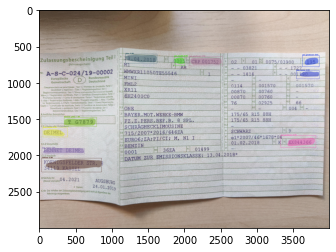

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


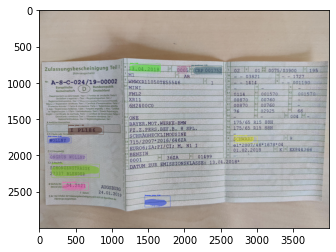

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


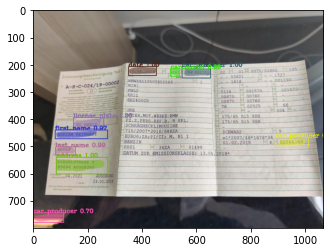

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


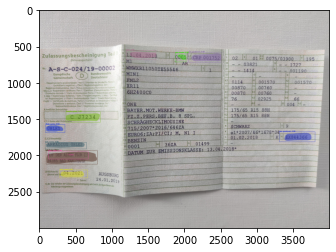

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


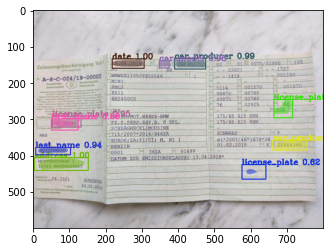

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


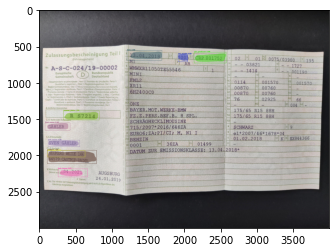

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


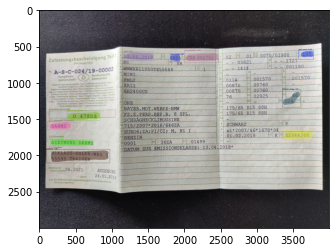

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


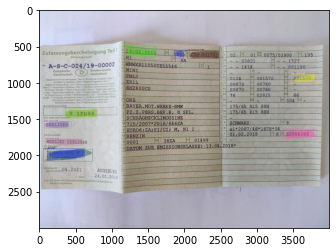

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


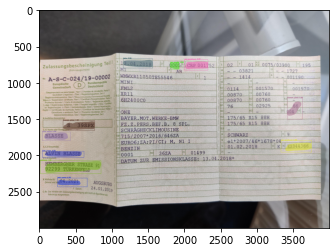

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


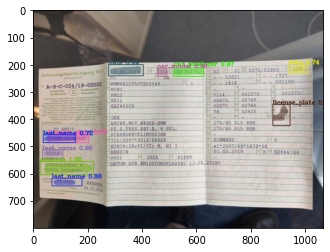

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


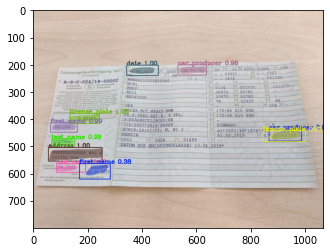

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


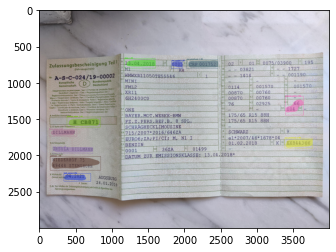

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


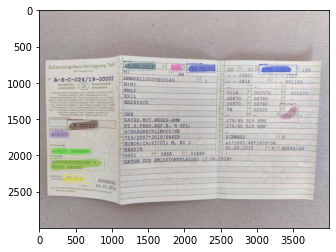

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


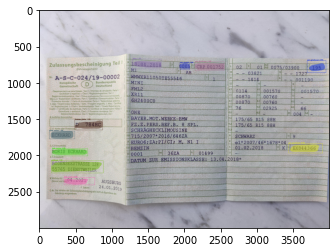

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


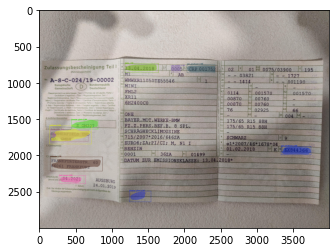

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


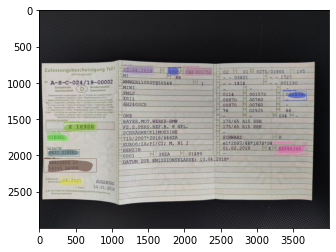

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


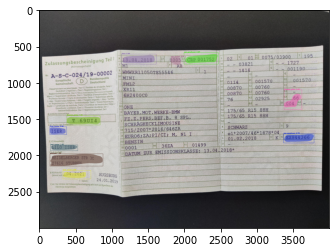

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


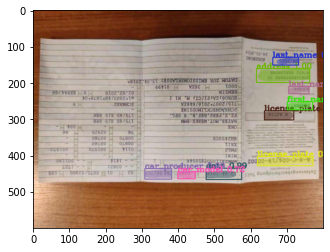

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


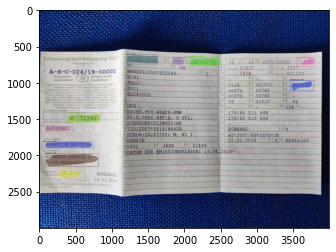

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


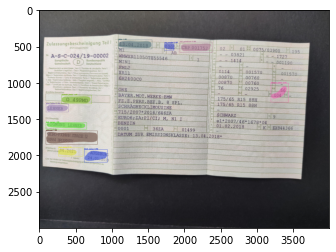

labels ['car_producer', 'license_plate', 'car_model', 'date', 'address', 'last_name', 'first_name']


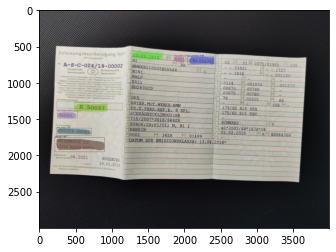

In [42]:
import glob


weights_path = "mask_rcnn_448_class_0701.h5"
MODEL_DIR = "/".join(weights_path.split("/")[:-2])
config = GenericConfig(7,100)
config.display()

# Create model in inference mode
with tf.device("/cpu:0"):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,config=config)

model.load_weights(weights_path, by_name=True)  
print("Weights loaded")
    

images = [file for file in glob.glob("/media/sohaib/additional_/DataScience/MaskRCNN/maskrcnn2_0/images/test/*.*g")]
print(len(images))


labels = ["car_producer","license_plate","car_model","date","address","last_name","first_name"]

for image in images:
    
    predict(model, image, labels)
    